In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://github.com/afnan47/sem7/raw/main/ML/5.%20KNN%20on%20Diabetes/diabetes.csv')

In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Pedigree', 'Age', 'Outcome'],
      dtype='object')

In [4]:
x = df.drop('Outcome',axis = 1)
y = df['Outcome']

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state = 1)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [8]:
pred = knn.predict(x_test)

In [12]:
from sklearn.metrics import accuracy_score ,ConfusionMatrixDisplay,classification_report

In [14]:
accuracy_score(y_test,pred)

0.796875

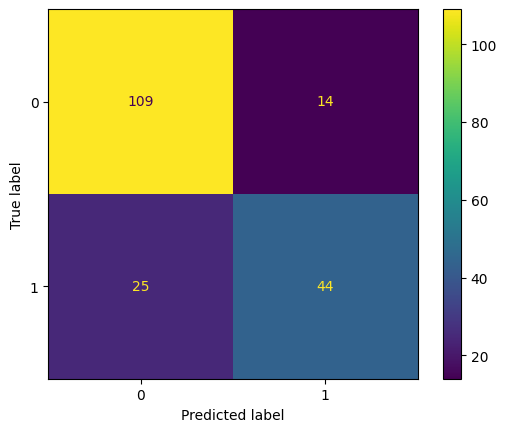

In [15]:
ConfusionMatrixDisplay.from_predictions(y_test,pred)

In [16]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       123
           1       0.76      0.64      0.69        69

    accuracy                           0.80       192
   macro avg       0.79      0.76      0.77       192
weighted avg       0.79      0.80      0.79       192



In [21]:
error = []
for k in range(1,41):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train,y_train)
  pred = knn.predict(x_test)
  error.append(np.mean(pred != y_test))

In [22]:
error

[0.2864583333333333,
 0.3072916666666667,
 0.2708333333333333,
 0.2708333333333333,
 0.203125,
 0.22916666666666666,
 0.21875,
 0.203125,
 0.21354166666666666,
 0.20833333333333334,
 0.22916666666666666,
 0.21875,
 0.21354166666666666,
 0.21875,
 0.21875,
 0.22395833333333334,
 0.22395833333333334,
 0.22395833333333334,
 0.234375,
 0.22395833333333334,
 0.22395833333333334,
 0.234375,
 0.21875,
 0.234375,
 0.234375,
 0.234375,
 0.22395833333333334,
 0.22916666666666666,
 0.22916666666666666,
 0.234375,
 0.234375,
 0.22916666666666666,
 0.21875,
 0.234375,
 0.22916666666666666,
 0.25,
 0.234375,
 0.2552083333333333,
 0.24479166666666666,
 0.23958333333333334]

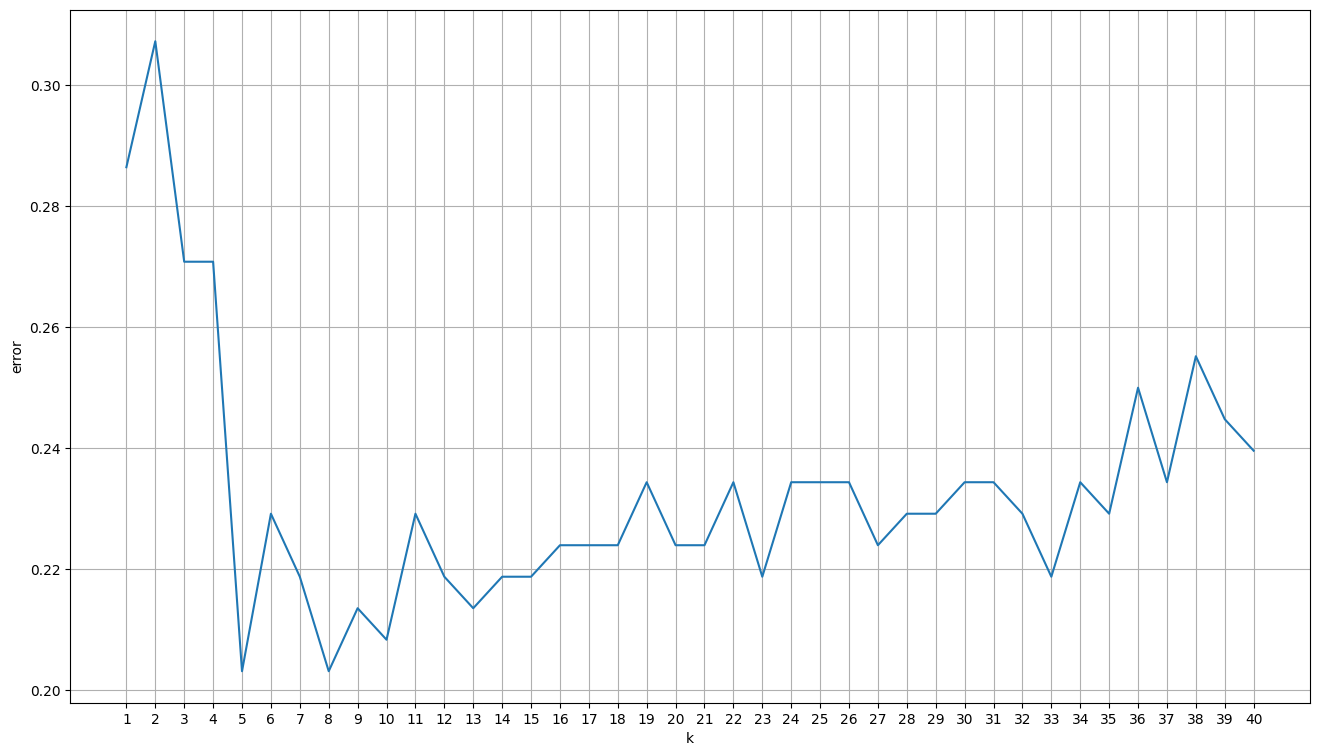

In [23]:
plt.figure(figsize = (16,9))
plt.xlabel('k')
plt.ylabel('error')
plt.grid()
plt.xticks(range(1,41))
plt.plot(range(1,41),error)